# **Practica 8 - Ecuaciones de Fresnel.**.
Valentina Merchán Sanchez, Sergio Alejandro Prieto, Angee Vanessa Segura.  
  Mediciones de Optica y Acustica.  
  Universidad Nacional de Colombia - 2025-1

### 1) Tres gráficas(una para cada tipo de luz: natural, polarización s y polarización p).

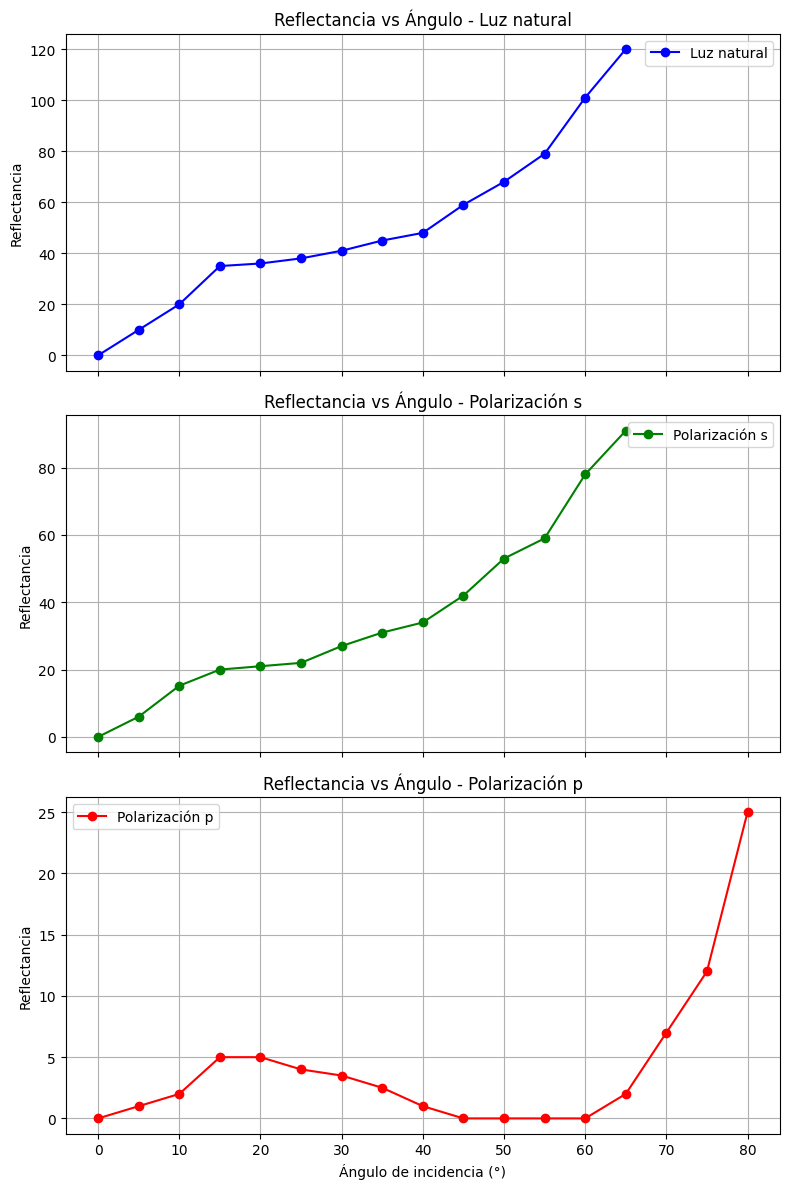

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
angulos = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
angulos2 = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
luz_natural = np.array([0, 10, 20, 35, 36, 38, 41, 45, 48, 59, 68, 79, 101, 120])
polarizado_s = np.array([0, 6, 15.2, 20, 21, 22, 27, 31, 34, 42, 53, 59, 78, 91])
polarizado_p = np.array([0, 1, 2, 5, 5, 4, 3.5, 2.5, 1, 0, 0, 0, 0, 2, 7, 12, 25])

# Crear figura y subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Gráfica 1: Luz natural
axs[0].plot(angulos2, luz_natural, 'b-o', label='Luz natural')
axs[0].set_ylabel('Reflectancia')
axs[0].set_title('Reflectancia vs Ángulo - Luz natural')
axs[0].grid(True)
axs[0].legend()

# Gráfica 2: Polarizado s
axs[1].plot(angulos2, polarizado_s, 'g-o', label='Polarización s')
axs[1].set_ylabel('Reflectancia')
axs[1].set_title('Reflectancia vs Ángulo - Polarización s')
axs[1].grid(True)
axs[1].legend()

# Gráfica 3: Polarizado p
axs[2].plot(angulos, polarizado_p, 'r-o', label='Polarización p')
axs[2].set_xlabel('Ángulo de incidencia (°)')
axs[2].set_ylabel('Reflectancia')
axs[2].set_title('Reflectancia vs Ángulo - Polarización p')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


### 2) ¿Qué valor obtuvo para el  ángulo de Brewster?

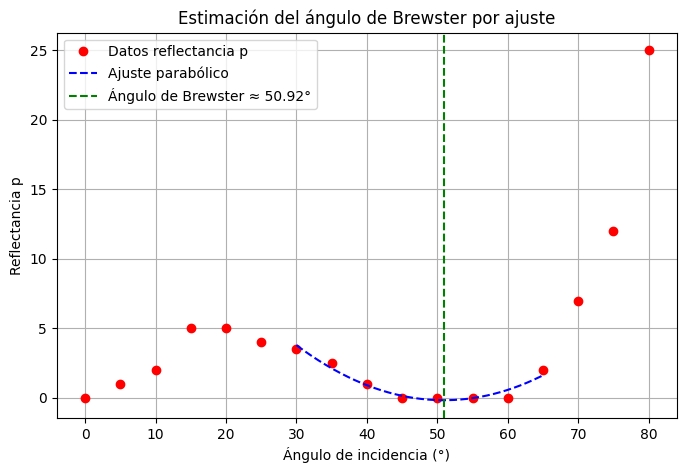

Ángulo de Brewster estimado: θ_B ≈ 50.92°
Ángulo de Brewster teórico: θ_B ≈ 56.31°
Discrepancia relativa porcentual:  9.57°


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import curve_fit

# Datos experimentales
angulos = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
Rp = np.array([0, 1, 2, 5, 5, 4, 3.5, 2.5, 1, 0, 0, 0, 0, 2, 7, 12, 25])

# Filtro: zona donde Rp está cerca del mínimo (elegimos ángulos 30°–65°)
filtro = (angulos >= 30) & (angulos <= 65)
theta_filtrado = angulos[filtro]
Rp_filtrado = Rp[filtro]

# Definir parábola
def parabola(theta, a, b, c):
    return a * theta**2 + b * theta + c

# Ajuste de curva
params, _ = curve_fit(parabola, theta_filtrado, Rp_filtrado)
a, b, c = params

# Calcular mínimo de la parábola (ángulo de Brewster estimado)
theta_B = -b / (2 * a)

# Graficar
theta_fit = np.linspace(30, 65, 300)
Rp_fit = parabola(theta_fit, a, b, c)

plt.figure(figsize=(8,5))
plt.plot(angulos, Rp, 'ro', label='Datos reflectancia p')
plt.plot(theta_fit, Rp_fit, 'b--', label='Ajuste parabólico')
plt.axvline(theta_B, color='green', linestyle='--', label=f'Ángulo de Brewster ≈ {theta_B:.2f}°')
plt.xlabel('Ángulo de incidencia (°)')
plt.ylabel('Reflectancia p')
plt.title('Estimación del ángulo de Brewster por ajuste')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultado
print(f'Ángulo de Brewster estimado: θ_B ≈ {theta_B:.2f}°')
n2 = 1.5
theta_B_rad = sp.atan(n2)
theta_B_deg = sp.N(sp.deg(theta_B_rad))

print(f'Ángulo de Brewster teórico: θ_B ≈ {theta_B_deg:.2f}°')
print(f'Discrepancia relativa porcentual:  {(theta_B_deg-theta_B)/theta_B_deg*100:.2f}°')


Los valores de reflectancia p muestran que entre 45° y 60°, la señal es muy baja marca completamente cero, pero no exactamente cero ya que hay un error experimental debido a la precisión del sensor utilizado. Para evitar depender de un solo punto, usamos ajuste de curva para encontrar el mínimo.
El mínimo de la parábola ocurre en:
$$θ_B= -\frac{b}{2a}$$
Con los datos experimentales se hallo el valor para el angulo de Brewster de:


$$\theta_B \approx 50.9^\circ \pm 2^\circ$$

El material  usado que fue el vidrio $$(n_2 \sim 1.5 \pm 0.1)$$, tomamos una incertiduumbre de 0.1 ya que no sabemos exactamente cual es el indice del vidrio usado.
Usando la fórmula teórica:

$$\theta_B = \tan^{-1} \left( \frac{n_2}{n_1} \right) = \tan^{-1} \left( \frac{1.5}{1} \right) \approx 56.3^\circ$$
El valor experimental está cerca del esperado para vidrio, aunque hay una discrepancia de 9.6%. Haciendo el calculo de la propagacion de errores tenemos un valor teorico de  $56.3 ±1.8$ por tanto ambos valores estan en un margen muy cercano.
El comportamiento observado en la reflectancia p concuerda con la predicción teórica, lo que valida la observación del fenómeno de Brewster. La diferencia puede atribuirse a factores experimentales como errores angulares, respuesta del sensor o condiciones ópticas del material.

### 3)  ¿Cómo medir el índice de refracción de la lamina de vidrio con polarización?
El fenómeno de polarización por reflexión y en especial el ángulo de Brewster permite medir experimentalmente el índice de refracción de un material dieléctrico.
$$
\tan(\theta_B) = \frac{n_2}{n_1}
$$

Si la luz incide desde el aire ($n_1 \approx 1.0$), el índice de refracción del segundo medio se puede calcular como:
$$
n_{2} = \tan(\theta_B)
$$

Usando el valor experimental medido:

$$
\theta_B^{\text{exp}} = 50.9^\circ \pm 2^\circ \Rightarrow  \quad n_{\text{vidrio}}^{\text{exp}} = \tan(50.9^\circ) \approx 1.22 \pm 0.09
$$

Este valor es inferior al índice de refracción típico del vidrio ($n \approx 1.5$), lo que sugiere que existen fuentes de error experimental. Entre ellas se incluyen l las mismas de la sección 2; la dificultad para identificar el mínimo de reflectancia, resolución angular limitada, o condiciones imperfectas de polarización y calidad superficial de la muestra.


### 4) ¿Realice dos graficas (reflectancia vs. ángulo de rotación del analizador) de los datos experimentales en los  ́angulos de incidencia de 30◦ y 70◦.¿Cual es el nuevo estado de polarización de la luz reflejada en cada caso?
El analizador se ubicó de tal forma que cuando estaba inclinado $65^\circ$ tnia polarización vertical, por tanto se tuuvo que sumar esto a todos los angulos.

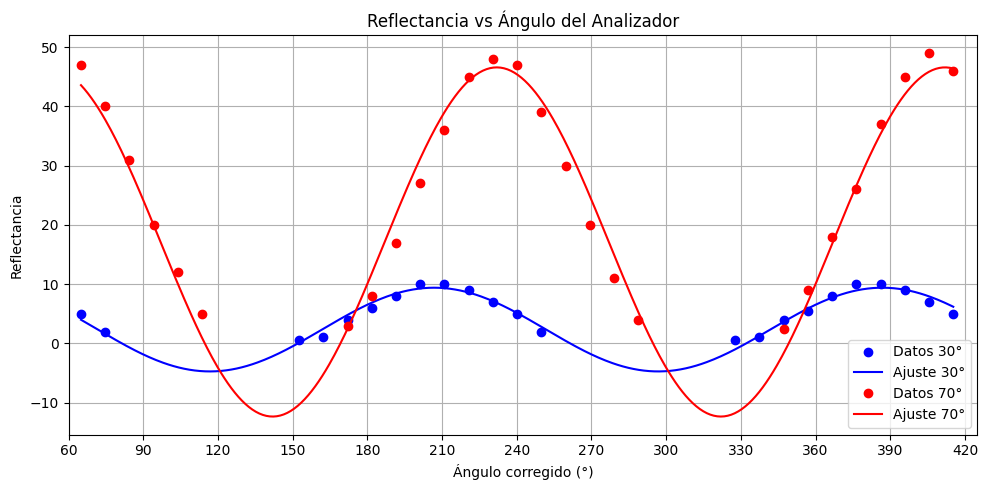

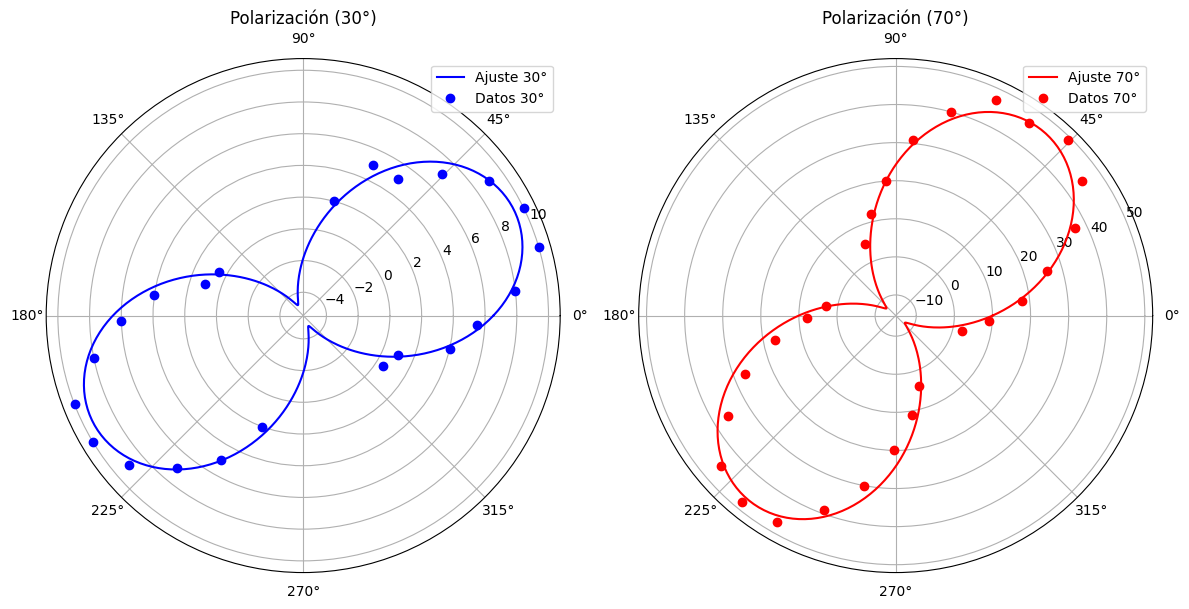

Ángulo de polarización estimado (30°): 126.44°
Ángulo de polarización estimado (70°): 76.09°


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# DATOS 

r_30 = np.array([
    5, 2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.5,
    1, 4, 6, 8, 10, 10, 9, 7, 5, 2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
    np.nan, 0.5, 1, 4, 5.5, 8, 10, 10, 9, 7, 5])

r_70 = np.array([
    47, 40, 31, 20, 12, 5, np.nan, np.nan, np.nan, np.nan, np.nan, 3,
    8, 17, 27, 36, 45, 48, 47, 39, 30, 20, 11, 4, np.nan, np.nan, np.nan, np.nan,
    np.nan, 2.5, 9, 18, 26, 37, 45, 49, 46])

#  ÁNGULOS 

desfase = 65  # grados
ang_base = np.linspace(0, 360, len(r_30), endpoint=False)
ang_rad = np.deg2rad(ang_base + desfase)
ang_30 = ang_rad
ang_70 = ang_rad  # mismo eje angular

# MODELO 

def coseno_ajuste(theta, A, B, phi):
    return A + B * np.cos(2 * theta + phi)

def ajustar(theta, datos):
    mask = ~np.isnan(datos)
    x = theta[mask]
    y = datos[mask]
    p0 = [np.mean(y), np.std(y), 0]
    params, _ = curve_fit(coseno_ajuste, x, y, p0=p0)
    return params

p_30 = ajustar(ang_30, r_30)
p_70 = ajustar(ang_70, r_70)

#  CURVAS 

# θ para los puntos medidos
th_30 = ang_30[~np.isnan(r_30)]
th_70 = ang_70[~np.isnan(r_70)]


th_fit_30 = np.linspace(th_30.min(), th_30.max(), 500)
th_fit_70 = np.linspace(th_70.min(), th_70.max(), 500)
y_fit_30 = coseno_ajuste(th_fit_30, *p_30)
y_fit_70 = coseno_ajuste(th_fit_70, *p_70)

th_full = np.linspace(0, 2*np.pi, 500)
y_full_30 = coseno_ajuste(th_full, *p_30)
y_full_70 = coseno_ajuste(th_full, *p_70)

#  GRAF CARTESIANA 

plt.figure(figsize=(10, 5))

plt.plot(np.degrees(th_30), r_30[~np.isnan(r_30)], 'bo', label='Datos 30°')
plt.plot(np.degrees(th_fit_30), y_fit_30, 'b-', label='Ajuste 30°')

plt.plot(np.degrees(th_70), r_70[~np.isnan(r_70)], 'ro', label='Datos 70°')
plt.plot(np.degrees(th_fit_70), y_fit_70, 'r-', label='Ajuste 70°')

plt.title('Reflectancia vs Ángulo del Analizador')
plt.xlabel('Ángulo corregido (°)')
plt.ylabel('Reflectancia')
plt.xlim(65, 425)
plt.xticks(np.arange(60, 431, 30))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -GRAF POLAR

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, polar=True)
ax1.plot(th_full, y_full_30, 'b-', label='Ajuste 30°')
ax1.plot(th_30, r_30[~np.isnan(r_30)], 'bo', label='Datos 30°')
ax1.set_title('Polarización (30°)')
ax1.set_theta_zero_location('E')
ax1.set_theta_direction(1)
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(1, 2, 2, polar=True)
ax2.plot(th_full, y_full_70, 'r-', label='Ajuste 70°')
ax2.plot(th_70, r_70[~np.isnan(r_70)], 'ro', label='Datos 70°')
ax2.set_title('Polarización (70°)')
ax2.set_theta_zero_location('E')
ax2.set_theta_direction(1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#PARÁMETROS


phi_deg_30 = np.degrees(p_30[2]) % 180
phi_deg_70 = np.degrees(p_70[2]) % 180

print(f"Ángulo de polarización estimado (30°): {phi_deg_30:.2f}°")
print(f"Ángulo de polarización estimado (70°): {phi_deg_70:.2f}°")


La luz entró polarizada a $45^\circ$ al vidrio y luuego se reflejó y fue detectada, utilizando el analizador (un polarizador rotando) se encontraron las curvas de cambio de intensidad descritas por la ley de Malus, haciendo un ajuste se encontró el nuevo angulo de polarización de la luz tras reflejarse en el vidrio. La reflexión puede cambiar su dirección de polarización ya que la reflexión afecta de manera distinta a las componentes paralela y perpendicular al plano de incidencia. Para un angulo de incidencia de $30^\circ$ el nuevo angulo de polarizacion fue $126^\circ$, por tanto hubo un cambio de $81^\circ$. Por otra parte para un angulo de incidencia de $70^\circ$ el nuevo angulo de polarizacion fue $76^\circ$, por tanto hubo un cambio de $31^\circ$. Estos resultados evidencian que el ángulo de incidencia influye de manera significativa en la rotación del plano de polarización de la luz reflejada. A ángulos bajos, las componentes paralela y perpendicular al plano de incidencia se reflejan con diferencias notables en amplitud y fase, lo que puede inducir una rotación considerable de la dirección de polarización. Por otro lado, a ángulos cercanos al de Brewster (aproximadamente $56^\circ$  para vidrio-aire), la componente paralela se transmite mayoritariamente y apenas se refleja, de modo que la componente perpendicular domina en la luz reflejada, y la rotación resultante es menor. La polarizacion puede pareceer eliptica en las graficas ya que el detector marcaba cero en un amplio rango de angulos del analizador ya que la intencidad de la luz era muy baja, por tanto se tuvieron menos datos disponibles cerca al centro.